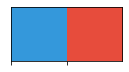

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Color palette for customization
flatui = ["#3498db","#e74c3c"]
sns.palplot(sns.color_palette(flatui))
#plt.style.use('ggplot')

In [2]:
# Loading Data
df = pd.read_csv("Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Renaming DiabetesPedigreeFunction column
df = df.rename({'DiabetesPedigreeFunction': 'DPF'}, axis=1)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

## Exploratory Data Analysis

<AxesSubplot: xlabel='Outcome', ylabel='count'>

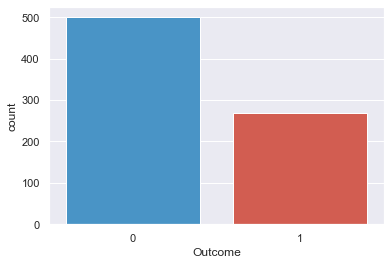

In [8]:
#countplot of target veriable
sns.set()
sns.countplot(x ='Outcome',data=df,palette=flatui )

In [9]:
#Its show that we have sufficient amount of data for true and false & its show that our data is not imbalanced
print("Non-diabetic patient '0' :", len(df[df['Outcome']==0]))
print("Diabetes patient '1' :",len(df[df['Outcome']==1]))

Non-diabetic patient '0' : 500
Diabetes patient '1' : 268


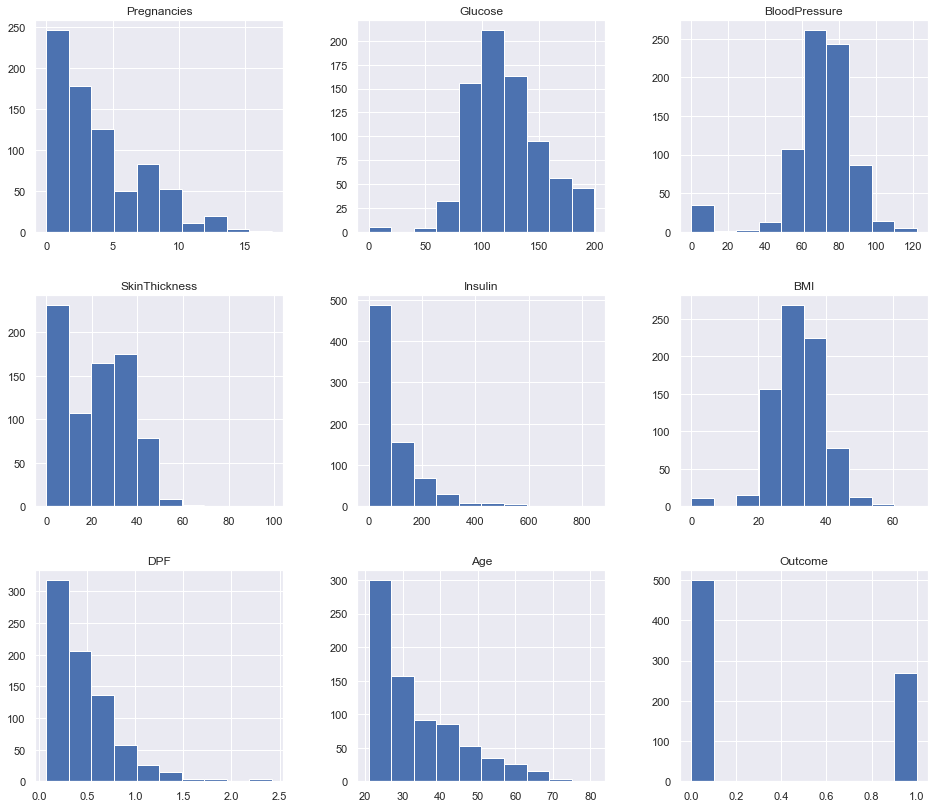

In [10]:
#Exploring the PDFs
df.hist(figsize = (16,14), color="b")
plt.show()

In [11]:
#On these columns, a value of zero does not make sense and thus indicates missing value.
print("--Total Numbe Zero--")
print("Glucose :", len(df[df['Glucose']==0]))
print("BloodPressure :", len(df[df['BloodPressure']==0]))
print("SkinThickness",len(df[df['SkinThickness']==0]))
print("Insulin :", len(df[df['Insulin']==0]))
print("BMI :", len(df[df['BMI']==0]))
print("DPF :", len(df[df['DPF']==0]))
print("Age :", len(df[df['Age']==0]))


--Total Numbe Zero--
Glucose : 5
BloodPressure : 35
SkinThickness 227
Insulin : 374
BMI : 11
DPF : 0
Age : 0


In [12]:
# Replace the zeros with NaN Values
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isna().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [13]:
# Replacing NaN value by mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)

## Correlation Matrix

In [14]:
df_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DPF,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot: >

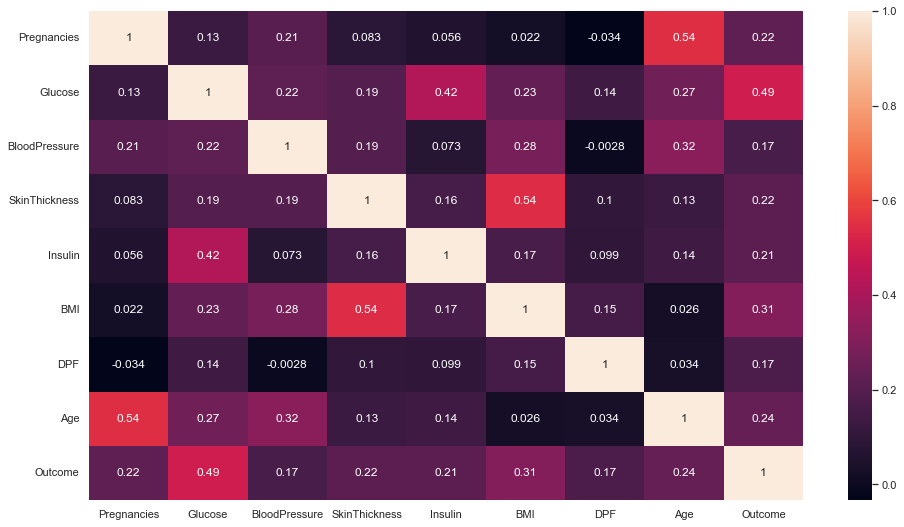

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df_copy.corr(),annot=True)

### Model Development

In [16]:
#Declaring dependent and independent variables
x = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Training and Testing Data

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [19]:
#Algorithms Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#Training Model
dt.fit(x_train,y_train)

#Model Summary
y_pred_dt = dt.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_score(y_test,y_pred_dt)

0.7272727272727273

In [20]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_dt)

array([[86, 21],
       [21, 26]], dtype=int64)

#### Logistic Regression

In [21]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)

0.8116883116883117

#### Support Vector Classifier

In [22]:
# Model Building
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)

0.7792207792207793

#### Random Forest

In [23]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)

rfc.fit(x_train, y_train)

y_pred_rf = rfc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Model Accuracy :",accuracy_score(y_test,y_pred_rf))

Model Accuracy : 0.8246753246753247


In [24]:
# Confusion matix
confusion_matrix(y_test,y_pred_rf)

array([[98,  9],
       [18, 29]], dtype=int64)

In [25]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [26]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(ensemble.RandomForestClassifier(criterion='gini'),
                   {'n_estimators': [10,15,20,50,100,200]},cv=5)

clf.fit(x_train,y_train)
clf.cv_results_
clf_df = pd.DataFrame(clf.cv_results_)
clf_df = clf_df[['param_n_estimators','mean_test_score']]
clf_df

,param_n_estimators,mean_test_score
0,10,0.746035
1,15,0.728042
2,20,0.736199
3,50,0.749220
4,100,0.745942
5,200,0.745968


In [27]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(y_pred_rf, columns=['Prediction'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual'] = y_test

df_ev.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [28]:
def prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glu = float(Glucose)
    blp = float(BloodPressure)
    st = float(SkinThickness)
    insu = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg,glu,blp,st,insu,bmi,dpf,age]]
    x = scaler.transform(x)

    return rfc.predict(x)[0]

In [32]:

prediction(6,148,72,35,0,33.6,1.627,50)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1

In [30]:
prediction(1,89,66,23,94,28.1,0.167,21)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [31]:
prediction(0,137,40,35,168,43.1,2.288,33)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1